# WEEK 2 LAB ASSIGNMENT


Given the datasets below write the code for 3 questions.

In [31]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)  # For reproducibility
n_points = 50  # Number of points per class

In [32]:
def plot_dataset(X, y):
    """
    Plot a 2D dataset.

    Parameters:
        X : numpy.ndarray
            Input features, shape (n_samples, n_features).
        y : numpy.ndarray
            Target labels, shape (n_samples,).
    """
    # Plot the dataset
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Scatter plot of the dataset')
    plt.show()

In [33]:
def plot_decision_boundary(model, X, y, thresholding=False, threshold=0.66):
    """
    Plots the decision boundary for a model.
    
    Parameters:
    - model: The trained model (Perceptron or LMS-based Perceptron).
    - X: Feature dataset.
    - y: Labels.
    - thresholding: Whether to apply thresholding (for LMS-based Perceptron).
    - threshold: The threshold value to apply if thresholding is True.
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    if thresholding:
        # Apply threshold to get binary class labels for LMS-based Perceptron
        Z = np.where(Z > threshold, 1, 0)
    else:
        # For the Perceptron with the step function, round predictions to nearest integer
        Z = np.round(Z)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5, levels=np.unique(Z).size - 1, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

In [34]:
def subplot_decision_boundary(model, X, y, ax=None, thresholding=False, threshold=0.66):
    if ax is None:
        fig, ax = plt.subplots()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    if thresholding:
        Z = np.where(Z > threshold, 1, 0)
    else:
        Z = np.round(Z)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5, levels=np.unique(Z).size - 1, cmap=plt.cm.Spectral)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary')

### Easy Dataset
Dataset 1(Easy): Linearly separable dataset. 

Decision boundary should be close to line $$y = x - 6$$

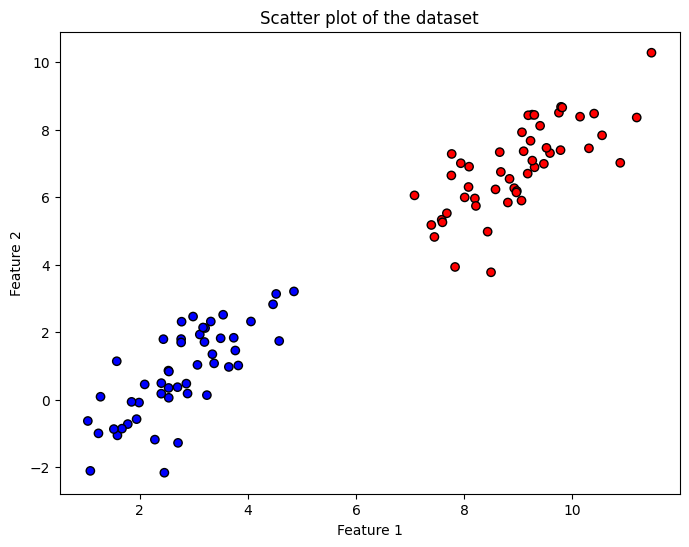

In [35]:
x1e_class1 = np.random.normal(3, 1, n_points)
x2e_class1 = x1e_class1 - 2 + np.random.normal(0, 1, n_points)
x1e_class2 = np.random.normal(9, 1, n_points)
x2e_class2 = x1e_class2 - 2 - np.random.normal(0, 1, n_points)


X_e = np.vstack((np.column_stack((x1e_class1, x2e_class1)), np.column_stack((x1e_class2, x2e_class2))))
y_e = np.hstack((np.zeros(n_points), np.ones(n_points)))
plot_dataset(X_e,y_e)

## Question 1
FILL the code for perceptron and test it for the **Easy** dataset

In [36]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Set binary class labels for the dataset
        y_ = np.array([1 if i> 0 else 0 for i in y])
        
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Calculate points and predict
                output =np.dot(x_i,self.weights) + self.bias
                output = self._unit_step_func(output)
                # Update perceptron
                update = self.lr * (y_[idx] - output)
                self.weights += update * x_i
                self.bias += update

                
    def predict(self, X):
        # Calculate the points (Shown in class)
        # Use activation function to predict
        #########################
        y_predicted = np.dot(X,self.weights) +self.bias
        y_predicted = self.activation_func(y_predicted)
        #########################
        return y_predicted

    def _unit_step_func(self, x):
        #Implement step function return the value
        #########################
        # Write your code here
        return np.where(x>=0,1,0)


In [37]:
class Perceptron2:
    def __init__(self, learning_rate=0.01, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Set binary class labels for the dataset
        y_ = np.array([1 if i> 0 else 0 for i in y])
        
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Calculate points and predict
                error = y_[idx] - self.predict(x_i)
                # Update perceptron
                self.weights += self.lr * error * x_i
                self.bias += self.lr * error
             
    def predict(self, X):
        # Calculate the points (Shown in class)
        # Use activation function to predict
        #########################
        y_predicted = np.dot(X,self.weights) +self.bias
        y_predicted = self.activation_func(y_predicted)
        #########################
        return y_predicted

    def _unit_step_func(self, x):
        #Implement step function return the value
        #########################
        # Write your code here
        return np.where(x>=0,1,0)


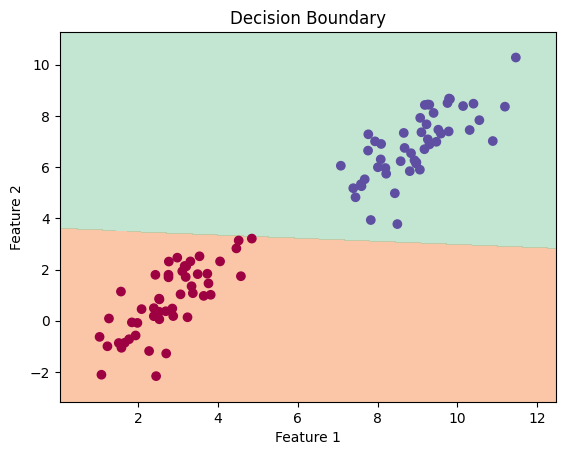

In [38]:
p = Perceptron2(learning_rate=0.0001, n_iters=1000)
p.fit(X_e, y_e)
y_predict = p.predict(X_e)
plot_decision_boundary(p,X_e,y_predict)
plt.show()

## Question 2
FILL the code for LMSE and test it for the **Easy** dataset

In [39]:
class LMSE:
    def __init__(self, learning_rate=0.01, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Here we use the linear output directly, no step function
                y_predicted = linear_output
                # The error is the difference between actual and predicted outputs
                error = y[idx] - y_predicted
                # Update weights and bias based on the error and learning rate
                self.weights += self.lr * error * x_i
                self.bias += self.lr * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = linear_output
        # Instead of returning a binary class, return the linear output directly
        return y_predicted

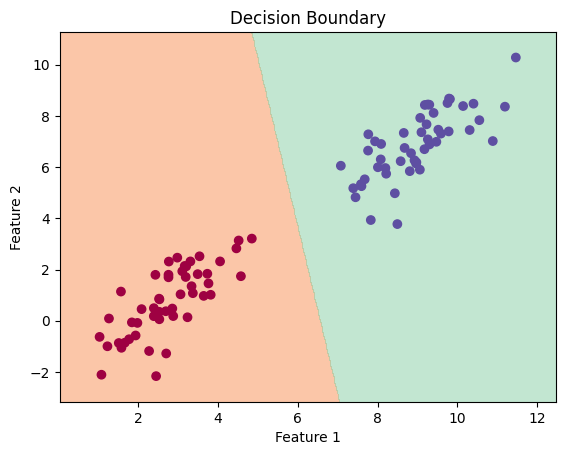

In [40]:
l = LMSE()
l.fit(X_e, y_e)
plot_decision_boundary(l,X_e,y_e, thresholding=True)
plt.show()

### Hard Dataset
Dataset 2(Hard): Non-linearly separable dataset 
Decision boundary should be close to line $$y = x - 6$$ with some overlap

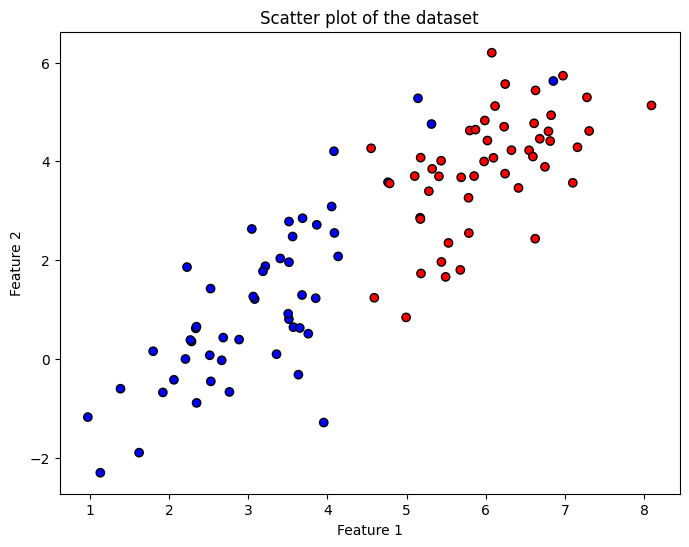

In [41]:
x1h_class1 = np.random.normal(3, 1, n_points)
x2h_class1 = x1h_class1 - 2 + np.random.normal(0, 1, n_points)
x1h_class2 = np.random.normal(6, 1, n_points)
x2h_class2 = x1h_class2 - 2 - np.random.normal(0, 1, n_points)

X_h = np.vstack((np.column_stack((x1h_class1, x2h_class1)), np.column_stack((x1h_class2, x2h_class2))))
y_h = np.hstack((np.zeros(n_points), np.ones(n_points)))
plot_dataset(X_h,y_h)

### XOR Dataset
Dataset 3: Represents XOR dataset. It is non-linearly separable dataset

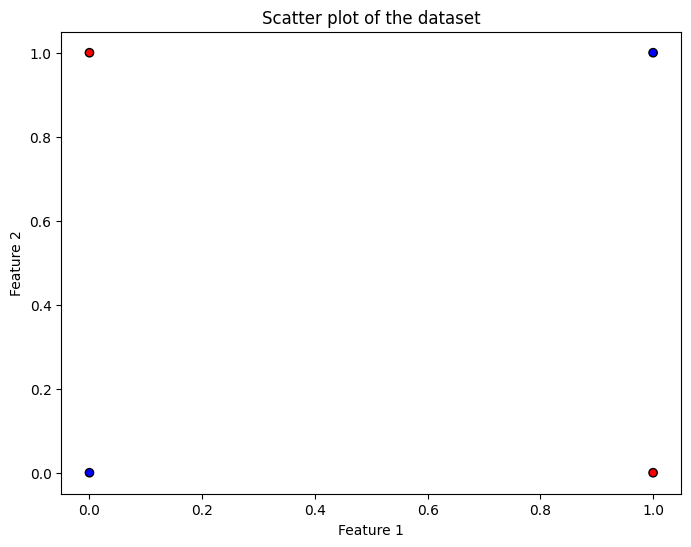

In [42]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
plot_dataset(X_xor,y_xor)

## Question 3
Compare LMSE and Perceptron Algorithms for 3 datasets with two different learning rates.

AttributeError: 'str' object has no attribute 'predict'

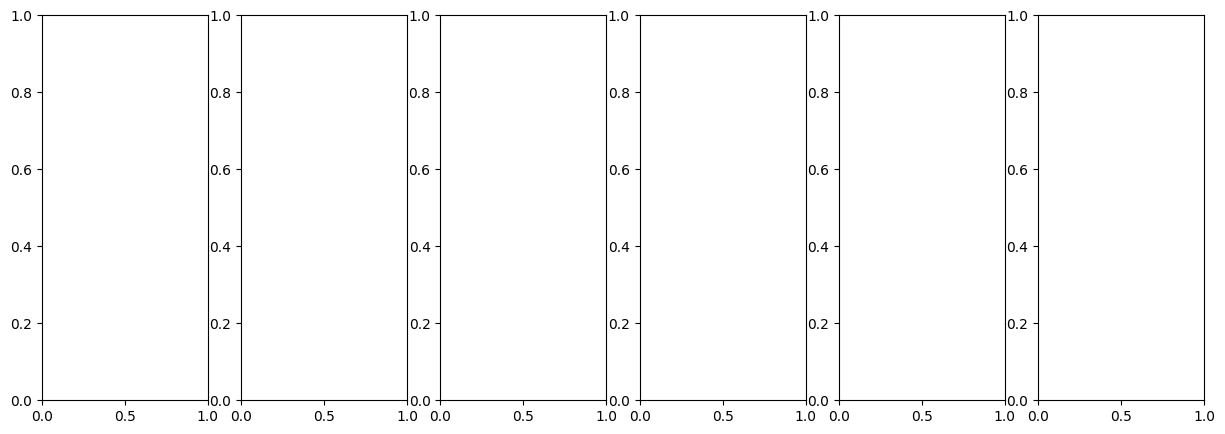

In [43]:
classifiers = """FILL"""
datasets = [(X_e,y_e),(X_h,y_h),(X_xor,y_xor),(X_e,y_e),(X_h,y_h),(X_xor,y_xor)]

# Plotting
fig, axs = plt.subplots(1, len(datasets), figsize=(15, 5))  # Adjust grid size as needed
for ax, (classifier, (X, y)) in zip(axs, zip(classifiers, datasets)):
    subplot_decision_boundary(classifier, X, y, ax=ax)
